<a href="https://colab.research.google.com/github/marquesbmc/Artificial-Intelligence/blob/main/GRIDENV_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Código de Q-learning em uma Grade 7x7

Este notebook apresenta a implementação de um agente que aprende a navegar em uma grade 7x7 para alcançar um ponto de objetivo **G** usando Q-learning. O agente sempre começa da posição **P** = (3,3), enquanto **G** é definido aleatoriamente a cada execução, mas sempre é diferente de **P**.

Componentes Principais:
1. Função get_goal_point():
Esta função gera uma posição aleatória para o objetivo **G** na grade, garantindo que não seja igual à posição inicial  **P**.

2. Classe Entity:
Representa uma entidade genérica na grade. Cada entidade tem um ID e uma posição.

3. Classe Agent:
Derivada de Entity.
Representa um agente que pode se mover pela grade.
Mantém uma tabela Q (state_actions) para rastrear o valor de cada ação em cada estado.
Usa uma estratégia epsilon-greedy para escolher ações.
Contém a função play para treinar o agente durante várias rodadas.
Mantém um registro dos estados visitados (visited_states).
4. Classe GridEnv:
Representa o ambiente de grade 7x7.
Contém métodos para mover entidades, calcular recompensas e visualizar o caminho tomado pelo agente.
O objetivo **G** é definido nesta classe.
5. Função main():
Inicializa o ambiente e o agente.
Treina o agente por 500 rodadas e visualiza sua performance.
Testa a política aprendida pelo agente e visualiza o caminho tomado.
Observações:
Estratégia Epsilon-Greedy: No início, o agente explora completamente, mas à medida que aprende, explora menos e explota mais o que aprendeu.

Recompensas e Penalidades: O agente é recompensado ao atingir o objetivo e penalizado por movimentos ineficientes ou por visitar estados já visitados.

Visualização: O código inclui uma função útil para visualizar o caminho do agente na grade.

Limitações Potenciais: O código parece ter um limite de 100 movimentos ao testar o agente. Além disso, a implementação da classe GridEnv parece estar incompleta.

## Estratégias de otimização do RF

### 1.Taxa de Exploração (Epsilon) no Q-learning


A Taxa de Exploração, frequentemente denotada como **ϵ**, é um componente fundamental no aprendizado por reforço, particularmente ao usar a estratégia epsilon-greedy. Ela determina a probabilidade de o agente escolher uma ação aleatória (explorar) em vez de escolher a ação que atualmente acredita ser a melhor (explorar).

Inicialização dos Atributos:
Na classe Agent, os atributos relacionados à taxa de exploração são inicializados da seguinte forma:

python
Copy code
self.exp_rate = 1  # 100% chance de escolher uma ação aleatória no início
self.exp_rate_decay = 0.995  # Taxa de decaimento do epsilon após cada episódio
self.exp_rate_min = 0.1  # Valor mínimo para a taxa de exploração
Escolha de Ações:
O método chooseAction decide qual ação o agente deve tomar:

```
def chooseAction(self):
    action = np.random.choice(self.actions) if np.random.uniform(0, 1) <= self.exp_rate else max(self.actions, key=lambda a: self.state_actions[self.pos][a])
    return action
```
Dentro deste método:

Se um número aleatório entre 0 e 1 for menor ou igual a self.exp_rate, o agente escolhe uma ação aleatória (explorando o ambiente).
Caso contrário, ele escolhe a ação com o maior valor Q para o estado atual (explorando o conhecimento adquirido).
Política de Decaimento:
A taxa de exploração não permanece constante. Ela decai com o tempo para fazer a transição do agente da exploração para a exploração. A política de decaimento é implementada no método play:

```
self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)
```
Após cada episódio de treinamento:

A self.exp_rate é multiplicada pelo fator de decaimento self.exp_rate_decay.
No entanto, a self.exp_rate nunca cai abaixo de self.exp_rate_min, garantindo que o agente mantenha alguma probabilidade de explorar, mesmo depois de muito treinamento.
Conclusão:
A estratégia epsilon-greedy, guiada pela Taxa de Exploração, garante que o agente tenha um equilíbrio entre explorar novas ações e explorar o conhecimento adquirido. Inicialmente, o agente tende a explorar mais, mas com o tempo e o aprendizado, ele começa a confiar mais em suas decisões baseadas no que já aprendeu.

### 2. Inicializar Valores Q Diferentemente:

No Q-learning, a tabela Q é uma representação do valor de cada ação em cada estado. Os valores Q são atualizados à medida que o agente aprende, mas a inicialização desses valores pode influenciar a velocidade e eficácia do aprendizado.

Implementação no Código:
```
self.state_actions = {(i, j): {a: np.random.rand() - 0.05 for a in self.actions} for i in range(WIDTH) for j in range(HEIGHT)}
```
Em vez de inicializar todos os valores Q com zero, o código opta por inicializá-los com pequenos valores aleatórios perto de zero (no intervalo de -0.05 a 0.95). Isso pode promover a exploração inicial de diferentes ações e estados, reduzindo potenciais empates entre ações nas fases iniciais.

### 3. Política de Decaimento:

A política de decaimento é uma estratégia para reduzir a taxa de exploração ao longo do tempo. Isso garante que, no início, o agente explore mais o ambiente, mas à medida que aprende, ele começa a confiar mais no seu conhecimento.

Implementação no Código:
```
self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)
```
Após cada episódio de treinamento, a taxa de exploração é multiplicada pelo fator de decaimento self.exp_rate_decay. No entanto, ela nunca cai abaixo de self.exp_rate_min, garantindo que haja sempre alguma chance de exploração.

### 4. Recompensas Negativas por Movimentos:

Recompensar ou penalizar o agente por suas ações é fundamental no aprendizado por reforço. Recompensas negativas por movimentos podem desencorajar o agente de fazer movimentos desnecessários ou ineficientes.

Implementação no Código:
```
penalidade_base = NON_GOAL_PENALTY
fator_incremental = 0.01
movimentos_feitos = len(Entity.states)
penalidade_por_movimento = penalidade_base + (movimentos_feitos * fator_incremental)
```
O agente é penalizado por cada movimento. A penalidade base é de -1, mas há uma penalidade incremental com base no número de movimentos já realizados. Isso pode desencorajar o agente de fazer movimentos excessivos e incentivá-lo a encontrar o caminho mais eficiente para o objetivo.

### 5. Implementar uma Estratégia de Visitação:

Manter um registro dos estados visitados pode ser útil para evitar que o agente repita movimentos desnecessários e incentive a exploração de novos estados.

Implementação no Código:
```
self.visited_states = {(i, j): 0 for i in range(WIDTH) for j in range(HEIGHT)}
```
O agente mantém um registro dos estados que visitou. Cada vez que visita um estado, esse registro é incrementado:
```
self.visited_states[self.pos] += 1
```
Ao calcular a recompensa, o agente é penalizado por revisitar estados:
```
visited_penalty = Entity.visited_states[Entity.pos] * -2
```
A penalidade é duas vezes o número de vezes que o estado foi visitado. Isso desencoraja o agente de revisitar estados repetidamente, promovendo a exploração de novos estados.

# Código

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_goal_point():
    while True:
        x = np.random.randint(0, WIDTH)
        y = np.random.randint(0, HEIGHT)
        if (x,y) != P:
            return (x,y)

# Constantes
WIDTH = 7  # Largura do ambiente
HEIGHT = 6  # Altura do ambiente
P = (3, 3)
G = get_goal_point()
EMPTY = -1  # Representação de uma célula vazia
GOAL_REWARD = 100  # Recompensa ao atingir o objetivo
NON_GOAL_PENALTY = -1  # Penalização para movimentos que não atingem o objetivo

### Entities

In [2]:
class Entity:
    current_id = 0  # ID atual (inicializado com 0)

    def __init__(self, env):
        Entity.current_id += 1  # Incrementa o ID
        self.id = Entity.current_id
        self.env = env  # Ambiente associado à entidade
        self.ini_pos = P
        #self.ini_pos = env.get_random_empty_cell()
        self.pos = self.ini_pos

In [3]:
class Agent(Entity):
    def __init__(self, env):
        super().__init__(env)
        self.actions = ["up", "left", "right", "down"]  # Ações possíveis
        self.states = []  # Estados visitados


        self.lr = 0.1  # Taxa de aprendizado
        # Inicializa valores Q para cada estado e ação
        #self.state_actions = {(i, j): {a: 0 for a in self.actions} for i in range(WIDTH) for j in range(HEIGHT)}
        self.state_actions = {(i, j): {a: np.random.rand() - 0.05 for a in self.actions} for i in range(WIDTH) for j in range(HEIGHT)}

        self.exp_rate = 1 # Taxa de exploração:  100% de chance de escolher uma ação aleatória
        self.exp_rate_decay = 0.995  # taxa de decaimento
        self.exp_rate_min = 0.1     # valor mínimo para a taxa de exploração

        # Inicializa o registro de visitação
        self.visited_states = {(i, j): 0 for i in range(WIDTH) for j in range(HEIGHT)}

    def chooseAction(self):
        # Escolhe ação baseada na estratégia epsilon-greedy
        mx_nxt_reward = float('-inf')
        action = np.random.choice(self.actions) if np.random.uniform(0, 1) <= self.exp_rate else max(self.actions, key=lambda a: self.state_actions[self.pos][a])
        return action

    def step(self, action):
        # Ensure action is valid
        if action not in self.actions:
            raise ValueError(f"Invalid action: {action}. Must be one of {self.actions}.")

        # Get the next position after taking the action
        next_state = self.env.nxtPosition(self, action)

        # Get the reward after taking the action
        reward = self.env.giveReward(self)

        # Check if the episode has ended (i.e., agent has reached the goal state)
        done = self.env.end

        # Placeholder for additional information (can be used for debugging)
        info = {}

        return next_state, reward, done, info

    def run_episode(self, rounds=10):
        episode_history = []  # List to record state, action, reward for each step

        for _ in range(rounds):
            # 1. Choose an action
            action = self.chooseAction()

            # 2. Take the action in the environment
            next_state, reward, done, _ = self.step(action)

            # 3. Record the results
            episode_history.append((self.pos, action, reward))

            # 4. Check if episode is finished
            if done:
                break

        # Update Q-values at the end of the episode
        final_reward = self.env.giveReward(self)
        for a in self.actions:
            self.state_actions[self.pos][a] = final_reward
        for s in reversed(episode_history):
            pos, action, r = s
            current_value = self.state_actions[pos][action]
            final_reward = current_value + self.lr*(r + final_reward - current_value)
            self.state_actions[pos][action] = round(final_reward, 3)
            final_reward = max(self.state_actions[pos].values())

        return episode_history

    def play(self, rounds=10):
        total_rewards = []  # Lista para armazenar a recompensa total por rodada

        for _ in range(rounds):
            total_reward = 0  # Recompensa total para esta rodada

            episode_history = []  # Armazena a trajetória do agente nesta rodada

            while not self.env.end:
                curr_state = self.pos
                action = self.chooseAction()

                # Move o agente e obtém recompensa
                self.env.nxtPosition(self, action)
                cur_reward = self.env.giveReward(self)

                total_reward += cur_reward  # Acumula a recompensa

                # Atualiza o registro de visitação
                self.visited_states[self.pos] += 1

                episode_history.append((curr_state, action, cur_reward))  # Armazena estado, ação e recompensa

            self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)

            # Atualiza valores Q usando a trajetória do episódio
            final_reward = episode_history[-1][-1]  # Recompensa do último passo
            for s in reversed(episode_history):
                pos, action, r = s
                current_value = self.state_actions[pos][action]
                reward = current_value + self.lr * (r + final_reward - current_value)
                self.state_actions[pos][action] = round(reward, 3)
                final_reward = max(self.state_actions[pos].values())

            total_rewards.append(total_reward)  # Adiciona a recompensa total para esta rodada à lista
            self.reset()

        return total_rewards  # Retorna a lista de recompensas totais


    def reset(self):
        self.states = []
        self.ini_pos = P
        self.pos = self.ini_pos
        self.env.reset()
        self.env.add_entity(self)
        self.visited_states = {(i, j): 0 for i in range(WIDTH) for j in range(HEIGHT)}

    def adjust_exp_rate(self, new_rate):
        # Ajusta a taxa de exploração
        self.exp_rate = new_rate


### GridEnv

In [4]:

class GridEnv:
    def __init__(self, grid_size_x=WIDTH, grid_size_y=HEIGHT):
        # Inicializa o ambiente
        self.end = False
        self.grid_size_x = grid_size_x
        self.grid_size_y = grid_size_y
        self.board = np.full([grid_size_x, grid_size_y], EMPTY)  # Cria uma matriz representando o ambiente
        self.entities = []  # Lista de entidades no ambiente

        #self.G = self.get_goal_point()
        self.G = G


    def add_entity(self, Entity):
        if self.board[Entity.pos] == EMPTY:
            """Adiciona uma entidade ao ambiente."""
            self.entities.append(Entity)
            self.board[Entity.pos] = Entity.id
        else:
            raise ValueError("board not empty in entity.pos")

    def move_entity(self, Entity, new_position):
        # If next position is within the grid and is empty
        if (0 <= new_position[0] < self.grid_size_x and 0 <= new_position[1] < self.grid_size_y and
            self.board[new_position] == EMPTY):

            # Update the previous position to empty
            self.board[Entity.pos] = EMPTY
            # Update the entity's position
            Entity.pos = new_position
            # Update the board with the entity's ID
            self.board[Entity.pos] = Entity.id
            return True  # Successful move

        return False  # Move not allowed

    def get_random_empty_cell(self):
        """Retorna uma célula vazia aleatória no board que não está na lista de entities."""
        empty_cells = np.argwhere(self.board == EMPTY)

        # Remover células que estão na lista de entities
        entity_positions = [entity.pos for entity in self.entities]
        empty_cells = [cell for cell in empty_cells if tuple(cell) not in entity_positions]

        if not empty_cells:
            raise ValueError("No empty cells available on the board!")

        return tuple(empty_cells[np.random.choice(len(empty_cells))])


    def reset(self):
        # Reinicia o ambiente para o estado inicial
        self.end = False
        self.board = np.full([self.grid_size_x, self.grid_size_y], EMPTY)
        self.entities = []
        self.G = G

    def nxtPosition(self, Entity, action):
        new_position = None

        # Calcula a próxima posição baseada na ação
        if action == "up":
            new_position = (Entity.pos[0]-1, Entity.pos[1])
        elif action == "down":
            new_position = (Entity.pos[0]+1, Entity.pos[1])
        elif action == "left":
            new_position = (Entity.pos[0], Entity.pos[1]-1)
        elif action == "right":
            new_position = (Entity.pos[0], Entity.pos[1]+1)

        # Attempt to move the entity to the next position
        self.move_entity(Entity, new_position)

        distance = abs(Entity.pos[0] - self.G[0]) + abs(Entity.pos[1] - self.G[1])

        if distance <= 1:
            self.end = True

        return Entity.pos

    def giveReward(self, Entity):
        # Calcula a distância euclidiana entre Entity.pos e G
        distance = abs(Entity.pos[0] - self.G[0]) + abs(Entity.pos[1] - self.G[1])

        # Recompensa Incremental Baseada na Distância
        reward_based_on_distance = 1 / (distance + 1)

        # Penalização Incremental por Movimento
        penalidade_base = NON_GOAL_PENALTY
        fator_incremental = 0.01  # este valor pode ser ajustado
        movimentos_feitos = len(Entity.states)  # assumindo que Entity.states armazena os movimentos
        penalidade_por_movimento = penalidade_base + (movimentos_feitos * fator_incremental)


        # Penalização por visitar um estado já visitado
        visited_penalty = Entity.visited_states[Entity.pos] * -2

        # Se o agente estiver perto do objetivo, ele receberá a recompensa com base na distância
        if distance <= 1:
            return GOAL_REWARD + reward_based_on_distance
        else:
            # Caso contrário, ele receberá a penalização incremental por movimento e a penalização por visitação
            return penalidade_por_movimento + visited_penalty



    def visualize_path(grid_env, path, goal):
        """
        Visualiza o caminho do agente no grid.

        Parâmetros:
        - grid_env: instância do ambiente GridEnv.
        - path: lista de posições (tuplas) que o agente tomou.
        - goal: posição (tupla) do objetivo.
        """

        # Cria uma representação do grid
        grid = np.zeros((grid_env.grid_size_x, grid_env.grid_size_y))

        # Marca o caminho do agente com 0.5
        for pos in path:
            grid[pos] = 0.5

        # Marca a posição inicial e final
        grid[path[0]] = 0.3  # início
        grid[path[-1]] = 0.7  # final

        # Marca o objetivo
        grid[goal] = 1.0

        plt.imshow(grid, cmap="gray_r")
        plt.colorbar()

        # Adiciona os números das coordenadas
        for y in range(grid_env.grid_size_y):
            for x in range(grid_env.grid_size_x):
                plt.text(x, y, f"{y},{x}", ha="center", va="center", color="red", fontsize=8)

        plt.title("Caminho do Agente")
        plt.show()

### Main

Agent.pos_ini:  (3, 3)
(0, 0) {'up': -14.919, 'left': -17.348, 'right': -8.745, 'down': -10.873}
(0, 1) {'up': -7.562, 'left': -13.907, 'right': -6.465, 'down': -6.457}
(0, 2) {'up': -5.641, 'left': -7.075, 'right': -4.559, 'down': -4.707}
(0, 3) {'up': -6.237, 'left': -4.696, 'right': -3.537, 'down': -2.216}
(0, 4) {'up': -6.752, 'left': -5.739, 'right': -4.425, 'down': -3.258}
(0, 5) {'up': -11.011, 'left': -4.667, 'right': -9.245, 'down': -2.755}
(0, 6) {'up': -10.203, 'left': -7.72, 'right': -7.306, 'down': -3.687}
(1, 0) {'up': -17.844, 'left': -14.738, 'right': -10.296, 'down': -6.068}
(1, 1) {'up': -7.313, 'left': -10.355, 'right': -5.493, 'down': -6.959}
(1, 2) {'up': -5.705, 'left': -8.143, 'right': 2.665, 'down': 4.616}
(1, 3) {'up': -4.974, 'left': -3.039, 'right': -4.325, 'down': 53.217}
(1, 4) {'up': -5.25, 'left': -4.157, 'right': -3.085, 'down': 76.014}
(1, 5) {'up': -6.999, 'left': -3.69, 'right': -2.815, 'down': 54.564}
(1, 6) {'up': -7.113, 'left': -3.924, 'right': -3

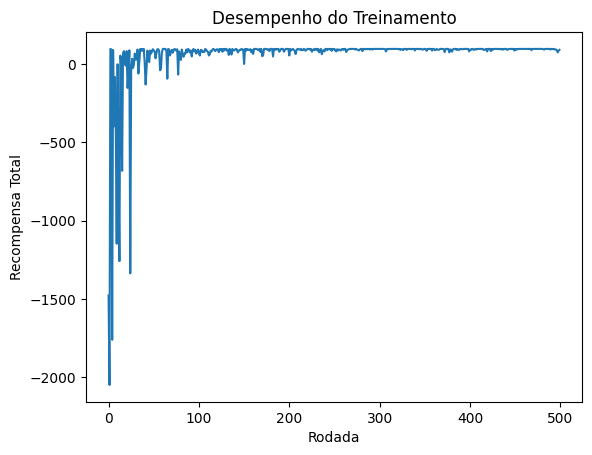

##### TESTE DE APRENDIZADO #####
ag_op.pos_ini:  (3, 3)
env.G:  (6, 6)
Posição: (3, 3), Ação: right, Próxima Posição: (3, 4)
Posição: (3, 4), Ação: down, Próxima Posição: (4, 4)
Posição: (4, 4), Ação: right, Próxima Posição: (4, 5)
Posição: (4, 5), Ação: down, Próxima Posição: (5, 5)
Posição: (5, 5), Ação: down, Próxima Posição: (6, 5)
Recompensa total durante o teste: 96.5

Melhor caminho encontrado:
env.G (6, 6)
Posição: (3, 3), Ação: right
Posição: (3, 4), Ação: down
Posição: (4, 4), Ação: right
Posição: (4, 5), Ação: down
Posição: (5, 5), Ação: down


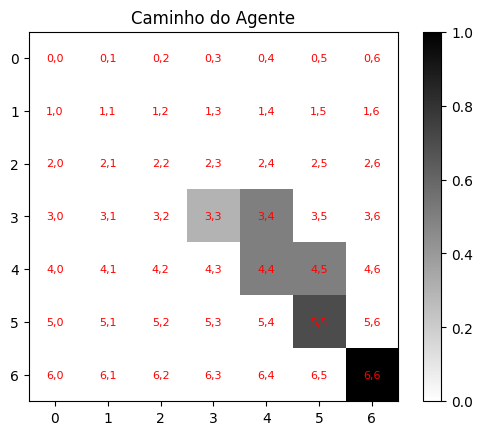

In [5]:
def main():
    env = GridEnv()
    ag = Agent(env)
    rewards = ag.play(rounds=500)
    print("Agent.pos_ini: ", ag.ini_pos )
    for i in range(WIDTH):
        for j in range(HEIGHT):
            print((i, j), ag.state_actions[(i, j)])

    # Plotando as recompensas ao longo das rodadas
    plt.plot(rewards)
    plt.xlabel('Rodada')
    plt.ylabel('Recompensa Total')
    plt.title('Desempenho do Treinamento')
    plt.show()


    print("##### TESTE DE APRENDIZADO #####")

    # Creating a new agent for testing purposes with the learned state actions
    ag_op = Agent(env)
    ag_op.state_actions = ag.state_actions
    ag_op.exp_rate = 0
    print("ag_op.pos_ini: ", ag_op.ini_pos)
    print("env.G: ", env.G)

    states = []
    actions = []  # list to store actions taken
    total_test_reward = 0  # track the total reward during testing
    counter = 0
    while not env.end:
        curr_state = ag_op.pos
        action = ag_op.chooseAction()
        states.append(curr_state)
        actions.append(action)  # store the action taken
        next_state, reward, _, _ = ag_op.step(action)  # using the step function to also get the reward
        total_test_reward += reward

        # Print da posição atual e ação
        print(f"Posição: {curr_state}, Ação: {action}, Próxima Posição: {next_state}")

        counter += 1
        if counter > 100:
            print("O agente não conseguiu chegar ao objetivo após 100 movimentos. Interrompendo...")
            break

    print(f"Recompensa total durante o teste: {total_test_reward}")

    # Print the path
    print("\nMelhor caminho encontrado:")
    print("env.G", env.G)
    for s, a in zip(states, actions):
        print(f"Posição: {s}, Ação: {a}")


    env.visualize_path(states, env.G)

    env.reset()

# Running the main function
main()
